# Neural Network Classification

## **Binary Classification**

Lets create a toy dataset, a dataset that is small enough to experiment with but still sizeable enough to practice the fundamentals

### **Data Creation**

In [1]:
# Make some data
import sklearn
from sklearn.datasets import make_circles

n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)


In [2]:
len(X),len(y)

(1000, 1000)

In [3]:
print(f"First five samples of X",X[:5])
print(f"First five samples of y",y[:5])

First five samples of X [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y [1 1 1 1 0]


Notice each datapoint has two features

In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Since the target variable y has only two possible options this is a binary classification problem

In [5]:
# Make dataframe of circle data
import pandas as pd
circles=pd.DataFrame({"X1":X[:, 0],"X2":X[:,1],"label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


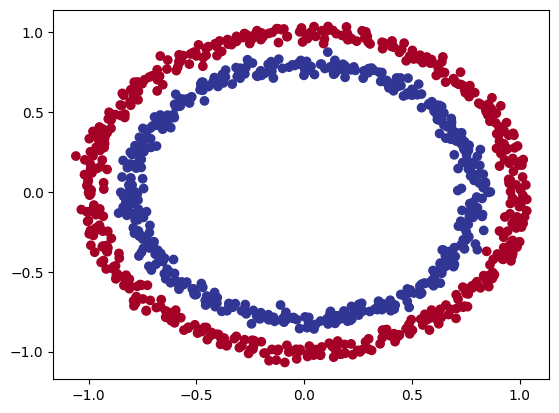

In [6]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
# Check input and output shapes

print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [8]:
# View the first sample of features and labels

X_sample=X[0]
y_sample=y[0]

print(f"Value of one sample of X: {X_sample} and same for y: {y_sample}")
print(f"Shape for one sample {X_sample.shape} and same for y: {y_sample.shape}")

Value of one sample of X: [0.75424625 0.23148074] and same for y: 1
Shape for one sample (2,) and same for y: ()


In [9]:
# Turn data into tensors 
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type((torch.float))



In [10]:
print(X.dtype)
print(y.dtype)

torch.float32
torch.float32


In [11]:
# Split data into train and test data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
print(n_samples)

1000


In [13]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

800 200 800 200


### **Building a model**

We are going to build a model to classify our blue and red dots

To do so, we want to :
1. Setup device code so our code can run on a acceleator
2. Construct a model by subclassing nn.Module
3. Define a loss function and optimizer
4. Create a training and testing loop

In [14]:
import torch
from torch import nn

# Make device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

####  **Steps to build a model**

1. Subclass `nn.Module` (all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a forward() method that outlines the forward pass 
4. Instantiate an instance of our model class and send it to the target device
 

In [15]:
X_train.shape

torch.Size([800, 2])

In [16]:
y_train.shape

torch.Size([800])

In [17]:
import torch.nn as nn
class CircleModel(nn.Module):
    """
    Simple feedforward neural network for 2D input data.
    Architecture: 2 → 5 → 1
    """
    def __init__(self):
        super().__init__()

        # Hidden layer: projects 2 input features to 5 neurons
        self.fc1 = nn.Linear(in_features=2, out_features=5)

        # Output layer: maps hidden representation to a single value
        self.fc2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        """
        Forward pass: input → hidden layer → output layer
        """
        x = self.fc1(x)
        x = self.fc2(x)
        return x


# Instantiate model and move to device
model_1 = CircleModel().to(device)
model_1


CircleModel(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)

We can visualise the neural network that we built and get some approximations on the loss value using an interface [Neural Network Playground](https://playground.tensorflow.org) 


**NOTE:** If we had ony two classes to predict and our loss comes out to be 0.5 that means the model is randomly guessing the output 


In [18]:
# Lets replicate the same model with nn.sequential

model_2=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
)
model_2

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

model_2 is a replication of model_1 with difference only in the way the layers are defined using .Sequential

In [19]:
model_2.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0983,  0.5815],
                      [-0.4360, -0.6593],
                      [-0.5595, -0.2289],
                      [-0.5722, -0.0337],
                      [-0.4519,  0.0962]])),
             ('0.bias', tensor([-0.2091,  0.3871, -0.4938, -0.2403,  0.0729])),
             ('1.weight',
              tensor([[-0.1163,  0.2686, -0.3387, -0.3954, -0.2714]])),
             ('1.bias', tensor([-0.2474]))])

In [20]:
# Make some predicitons with the model
with torch.inference_mode():
    untrained_preds=model_2(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape:{untrained_preds.shape}")
print(f"Length of test sample:{len(X_test)}, Shape:{X_test.shape}")
print(f"\nFirst 10 predictions: \n {untrained_preds[:10]}")
print(f"\n First 10 labels:\n {y_test[:10]}")

Length of predictions: 200, Shape:torch.Size([200, 1])
Length of test sample:200, Shape:torch.Size([200, 2])

First 10 predictions: 
 tensor([[-0.1619],
        [-0.0428],
        [-0.1240],
        [-0.1740],
        [ 0.4314],
        [ 0.4998],
        [ 0.3948],
        [ 0.5233],
        [-0.1475],
        [-0.0287]])

 First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


Our predictions are way off the labels as now the model is untrained 

#### **Setup a loss function and optimizer**

The loss function used for a model is problem specific.

For regression we mostly use mean absolute error or mean sqaured error 

For classifcation we use binary cross entropy or categorical cross entropy (cross entropy)

Loss function helps us understand how wrong our predictions are

To explore more about the different types of optimizers available check [torch.optim](https://docs.pytorch.org/docs/stable/optim.html)

**Logits**

A logit is the raw output of a model before applying a sigmoid or softmax.

When we feed our data into any classification model it simply outputs a raw score for example say 2.3 , this is not a probability prediction about which class the data point belongs to 

We apply sigmoid or softmax inorder to convert this raw score into a probability score (between 0 and 1).

Two types of loss functions we will be using here :

- **BCELoss()**- requires inputs to have gone through sigmoid activation funtion. BCELoss expects probabilities.

Drawbacks of this method: Applying sigmoid seperately can cause numerical instability and vanishing gradients for large logits

- **BCEWithLogitsLoss()**- expects raw logits and has sigmoid activation built in.


In [21]:
# Setup a loss function
loss_fn=nn.BCEWithLogitsLoss()   

"""
If we do something like nn.Sequential(
                        nn.Sigmoid(),
                        nn.BCELoss()
                        )
This would look very similar to BCEWithLogitsLoss
"""
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)



In [22]:
# Calculate accuracy- out of 100 examples , what percentage does our model get right
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()  # this will return a single value with sum of labels where pred=true
    acc=(correct/len(y_pred))*100
    return acc


### **Train the model**

To train our model, we build a training loop using the following steps :

1. Forward pass
2. Calculate loss
3. Optimize zero grad
4. Loss backward (backpropogation)
5. Optimizer step (gradient descent)

**Going from raw logits -> prediction probabilities -> predictions labels**

Our model outputs are going to be raw logits 

We can covert these **logits** into prediciton probabilities by passing htem to some kind of activation function (eg, sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our models prediction probabilties to preidciton labels by eithier rounding htem or taking the argmax() function


In [23]:
# View first 5 outputs of forward pass on test data
model_2.eval()
with torch.inference_mode():
    y_logits=model_2(X_test.to(device))[:5]
y_logits


tensor([[-0.1619],
        [-0.0428],
        [-0.1240],
        [-0.1740],
        [ 0.4314]])

In [24]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

We need our logits that is the model's predicitons to be of the same format like y_test ie 0,1 inorder to output a clear binary classification

So we use an activation function

In [25]:
# Use sigmoid activation function on our model logits to turn them into prediction labels

y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4596],
        [0.4893],
        [0.4690],
        [0.4566],
        [0.6062]])

For our prediciton probability values , we need to perform a range style rounding on them:
* `y_pred_probs`>=0.5 `y=1`(class 1)
* `y_pred_probs`<0.5 , `y=0`(class 0)

In [26]:
# Find the predicted labels 

y_preds=torch.round(y_pred_probs)

# In full, (logits-> pred probs-> pred labels)
y_pred_labels=torch.round(torch.sigmoid(model_2(X_test.to(device))[:5]))

# Check for equality 
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 1.])

In [27]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [28]:
loss_fn_without_logits=nn.BCELoss()
loss_fn_without_logits

BCELoss()

In [29]:
loss_fn

BCEWithLogitsLoss()

In [30]:
## Buidling a training and testing loop

torch.manual_seed(42)

epochs=100

for epoch in range(epochs):
    # Training
    model_2.train()
    y_logits=model_2(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))

    """
    loss=loss_fn_without_logits(torch.sigmoid(y_logits),y_train)

    If we were using BCELoss this is how we would pass inputs to the loss function
    """

    loss=loss_fn(y_logits,
             y_train)

    acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_logits=model_2(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))

        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

        if epoch % 10==0:
            print(f"Epoch:{epoch}| Loss:{loss:.5f},Acc:{acc:.2f},| test loss:{test_loss:.5f},test acc:{test_acc:.2f}%")


Epoch:0| Loss:0.70642,Acc:50.50,| test loss:0.70532,test acc:54.00%
Epoch:10| Loss:0.70243,Acc:50.38,| test loss:0.70187,test acc:52.00%
Epoch:20| Loss:0.70023,Acc:49.62,| test loss:0.69991,test acc:52.00%
Epoch:30| Loss:0.69884,Acc:49.75,| test loss:0.69863,test acc:50.00%
Epoch:40| Loss:0.69785,Acc:49.88,| test loss:0.69771,test acc:49.00%
Epoch:50| Loss:0.69710,Acc:50.50,| test loss:0.69700,test acc:48.50%
Epoch:60| Loss:0.69651,Acc:50.25,| test loss:0.69644,test acc:48.00%
Epoch:70| Loss:0.69603,Acc:50.38,| test loss:0.69599,test acc:48.50%
Epoch:80| Loss:0.69562,Acc:50.38,| test loss:0.69562,test acc:48.00%
Epoch:90| Loss:0.69529,Acc:50.50,| test loss:0.69533,test acc:48.00%


### **Make Predictions and Evaluate the Model**

From the metrics we can see that our model is not learning anything, so to inspect lets make some predicitons and make them visual

To do so we are going to import a function called plot decision boundary()


In [31]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

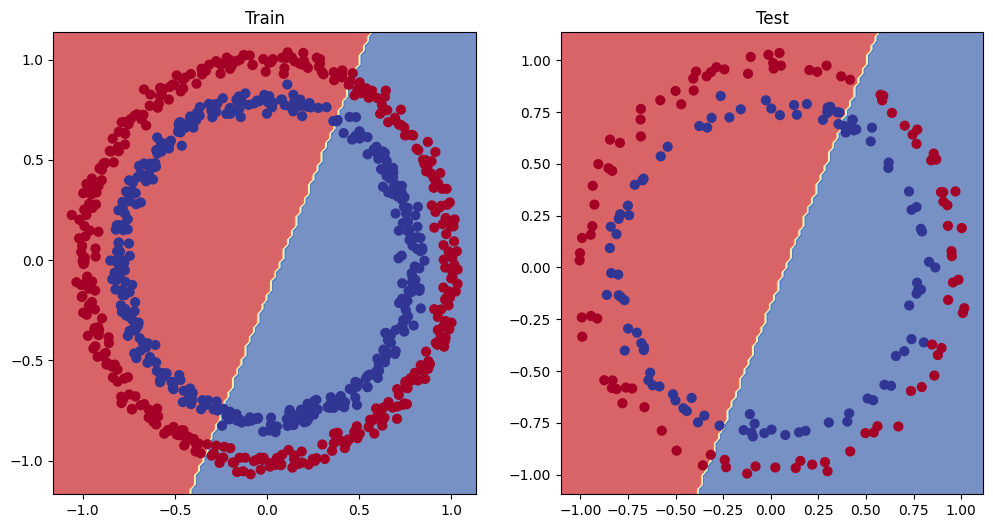

In [32]:
# Plot decision boundry of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,X_test,y_test)

As you can see this is the line our model is trying to draw , which is basically a straight line as our model comprises of two simple linear layers our model outputs something like this however the dataset we have at the moment cannot be seperated by a linear line

### **Improving our model (from a model perspective)**

1. Add more layers- give the model more changes to learn about patterns in the data
2. Add more hidden units - go from 5 hidden units to 10 hidden units 
3. Fit for longer - increase number of epochs
4. Changing the activation functions
5. Change the learning rate
6. Change the loss function

These options are all from a models perspective because they deal directly with the model rather than data

Ans because these options are all values can change they are referred to as **hyperparameters**

Lets try to improve our model by:
* adding more hidden units : 5 -> 10
* increase the number of layers: 2 -> 3
* increase the number of epochs:10 -> 100

Here for the purpose of experiment we make all three changes at once however, when we are running ML models in general we make one change at a time so we can better understand which factor led to betterment or degradation in the performance-**experiment tracking**


In [33]:

class CircleModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)

    def forward(self,x):
        """
        z=self.layer_1(x)
        z=self.layer_2(z)
        z=self.layer_3(z)
        return z

        Here we are basically passing our data through each layer , we can leverage 
        speedups by passing them directly as well
        """
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1=CircleModel2()
model_1

CircleModel2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# create a loss function
loss_fn=nn.BCEWithLogitsLoss()

# create a optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

# writing a training and evaluation loop
torch.manual_seed(42)
epochs=1000

for epoch in range(epochs):
    model_1.train()
    y_logits=model_1(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))

    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits=model_1(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
    if epoch %100==0:
        print(f"Epoch:{epoch}| Loss:{loss:.5f},Acc:{acc:.2f},| test loss:{test_loss:.5f},test acc:{test_acc:.2f}%")
            
        



Epoch:0| Loss:0.69396,Acc:50.88,| test loss:0.69261,test acc:51.00%
Epoch:100| Loss:0.69305,Acc:50.38,| test loss:0.69379,test acc:48.00%
Epoch:200| Loss:0.69299,Acc:51.12,| test loss:0.69437,test acc:46.00%
Epoch:300| Loss:0.69298,Acc:51.62,| test loss:0.69458,test acc:45.00%
Epoch:400| Loss:0.69298,Acc:51.12,| test loss:0.69465,test acc:46.00%
Epoch:500| Loss:0.69298,Acc:51.00,| test loss:0.69467,test acc:46.00%
Epoch:600| Loss:0.69298,Acc:51.00,| test loss:0.69468,test acc:46.00%
Epoch:700| Loss:0.69298,Acc:51.00,| test loss:0.69468,test acc:46.00%
Epoch:800| Loss:0.69298,Acc:51.00,| test loss:0.69468,test acc:46.00%
Epoch:900| Loss:0.69298,Acc:51.00,| test loss:0.69468,test acc:46.00%


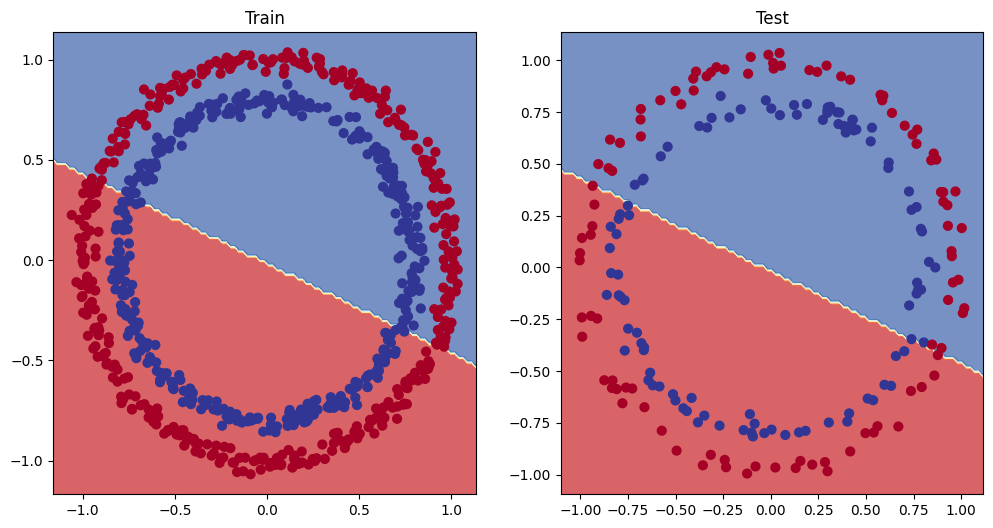

In [35]:
# plot the decision boundry
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

There is still no improvement in the metrics, the neural network we built still divides dataset linearly . Lets try to fit this model into a linear dataset and see how it performs

One way to troubleshoot a larger problem is to test a smaller model


In [36]:
# Creating a straight line dataset
weight=0.7
bias=0.3
start=0
end=1
step=0.01
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression + bias

print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [37]:
#create train and test split

train_split=int(0.8*len(X_regression))
X_train_regression,y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]

len(X_train_regression),len(X_test_regression),len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

In [38]:
# Plot predictions function from section I 
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

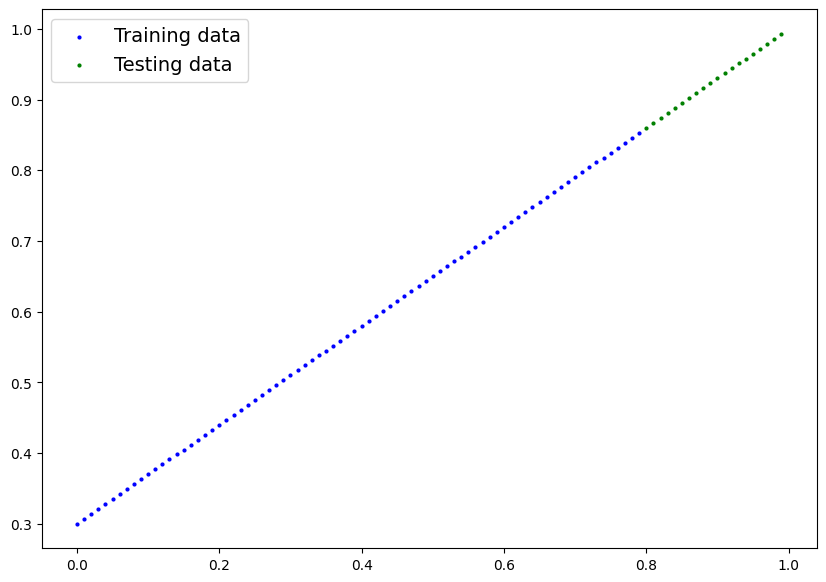

In [39]:
plot_predictions(train_data=X_train_regression,train_labels=y_train_regression,test_data=X_test_regression,test_labels=y_test_regression)

In [40]:
X_train_regression[:10] #only one feature per one label

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])

In [41]:
# fit model_1 into this daatset, we need to change the in_features for first layer here 

# Same architecture as model_1(using sequential)

model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)

).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.01)


In [43]:
# Train the model
torch.manual_seed(42)
epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    #Training
    y_pred = model_2(X_train_regression)
    
    loss = loss_fn(y_pred, y_train_regression)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Testing
    model_2.eval()
    with torch.inference_mode():
      test_pred = model_2(X_test_regression) 
      test_loss = loss_fn(test_pred, y_test_regression)
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 0.75986, Test loss: 0.91103
Epoch: 100 | Train loss: 0.02858, Test loss: 0.00081
Epoch: 200 | Train loss: 0.02533, Test loss: 0.00209
Epoch: 300 | Train loss: 0.02137, Test loss: 0.00305
Epoch: 400 | Train loss: 0.01964, Test loss: 0.00341
Epoch: 500 | Train loss: 0.01940, Test loss: 0.00387
Epoch: 600 | Train loss: 0.01903, Test loss: 0.00379
Epoch: 700 | Train loss: 0.01878, Test loss: 0.00381
Epoch: 800 | Train loss: 0.01840, Test loss: 0.00329
Epoch: 900 | Train loss: 0.01798, Test loss: 0.00360


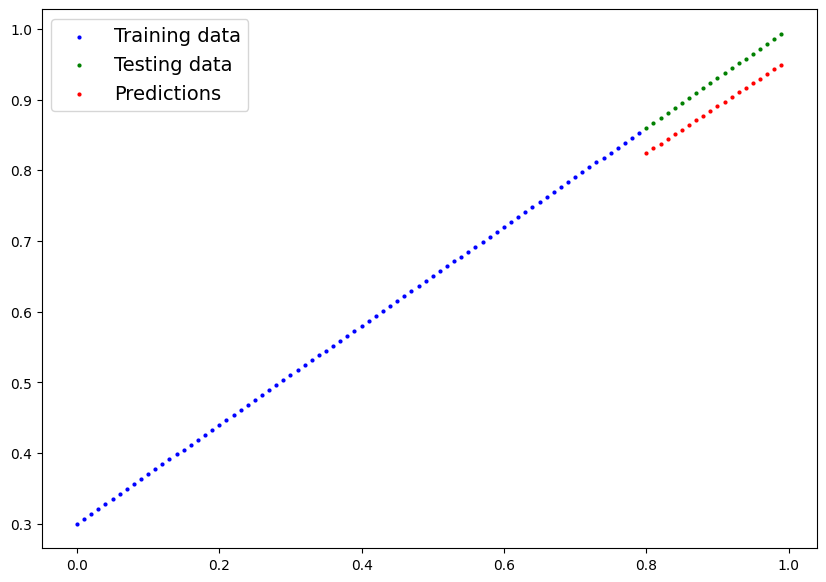

In [44]:
model_2.eval()

# Make predictions 
with torch.inference_mode():
    y_preds = model_2(X_test_regression)


plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

**NOTE:** The data we worked with before is non linear in nature , so we need to use non linear activation functions inorder to capture the patterns in the data


**Concept of Non Linearity**

Non linear means the relationship between input and output cannot be represented by a straight line.

A linear function will always try to draw a straight line inorder to differentiate between different classses. But real world data is rarely linear in nature 

A non-linear activation function bends and reshapes the space so instead of a straight cut you get a curved or more complex decision boundry

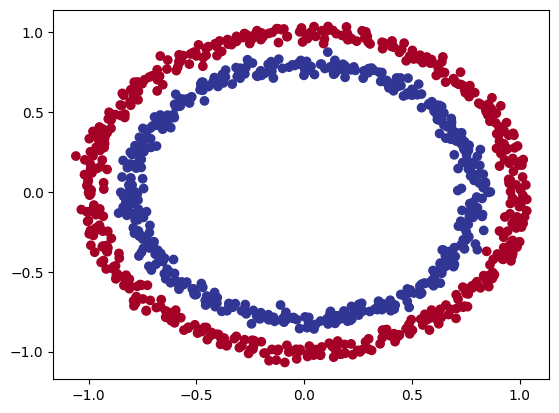

In [45]:
# Recreating non linear data (Red and blue circle)

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)



In [46]:
# Convert data to tensors and then train and test splits

import torch
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5],y_train[:5]



(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [47]:
# Buidling a model with non linear activation functions

from torch import nn
class CircleModel3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        self.relu=nn.ReLU()  #relu is non linear activation function
    def forward(self,x):
        return self.layer_3(self.layer_2(self.relu(self.layer_1(x))))
    

model_3=CircleModel3()
model_3

CircleModel3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

**NOTE:** Non Linear Activation Functions are placed between hidden layers and just after the output layer, however, there is no set in stone option.

In [48]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [49]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_3.eval()
    with torch.inference_mode():
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69441, Accuracy: 50.00% | Test Loss: 0.69412, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68984, Accuracy: 52.38% | Test Loss: 0.68935, Test Accuracy: 51.00%
Epoch: 200 | Loss: 0.68707, Accuracy: 58.25% | Test Loss: 0.68601, Test Accuracy: 59.00%
Epoch: 300 | Loss: 0.68338, Accuracy: 53.87% | Test Loss: 0.68177, Test Accuracy: 58.00%
Epoch: 400 | Loss: 0.67826, Accuracy: 53.87% | Test Loss: 0.67591, Test Accuracy: 57.00%
Epoch: 500 | Loss: 0.67058, Accuracy: 53.25% | Test Loss: 0.66753, Test Accuracy: 58.00%
Epoch: 600 | Loss: 0.65828, Accuracy: 59.13% | Test Loss: 0.65466, Test Accuracy: 59.00%
Epoch: 700 | Loss: 0.63517, Accuracy: 71.75% | Test Loss: 0.63262, Test Accuracy: 75.00%
Epoch: 800 | Loss: 0.59027, Accuracy: 85.88% | Test Loss: 0.59330, Test Accuracy: 87.00%
Epoch: 900 | Loss: 0.51050, Accuracy: 94.12% | Test Loss: 0.52613, Test Accuracy: 90.50%


In [50]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] 

(tensor([1., 1., 1., 0., 1., 1., 0., 0., 1., 1.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

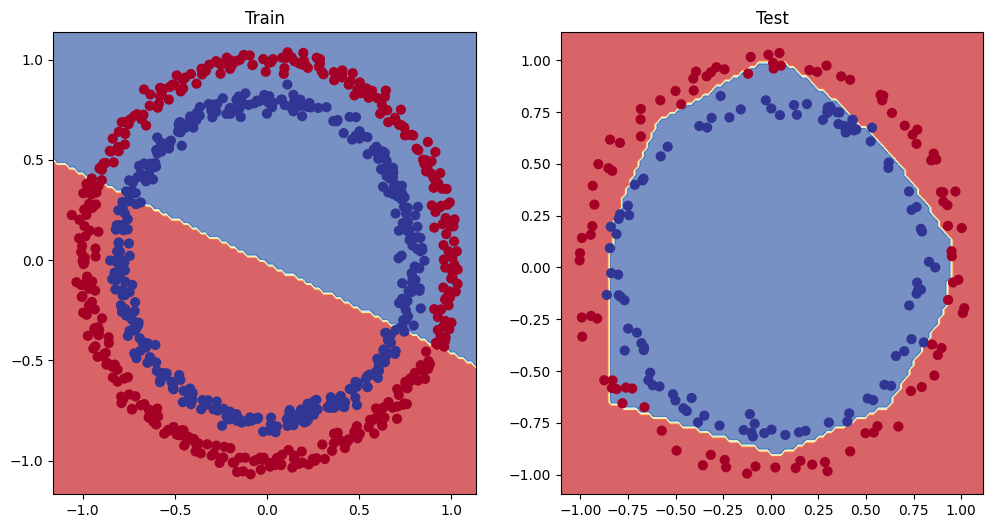

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

### **Replicating non linear activation functions**

Neural Networks rather than us telling model what to learn, we give it tools to discover patterns in data and patterns on its own

And these tools are linear and non linear functions

In [52]:

A=torch.arange(-10,10,1,dtype=torch.float32)
A.dtype
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

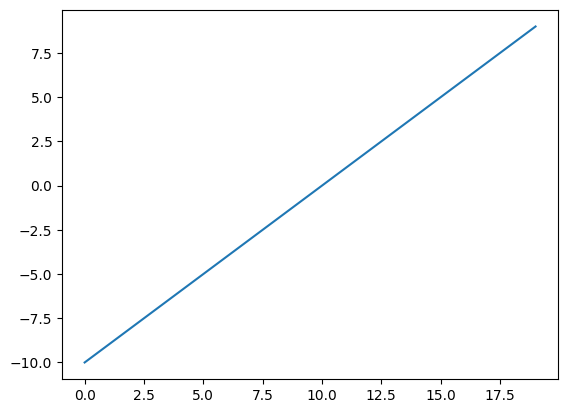

In [53]:
# Visualize the data
plt.plot(A)

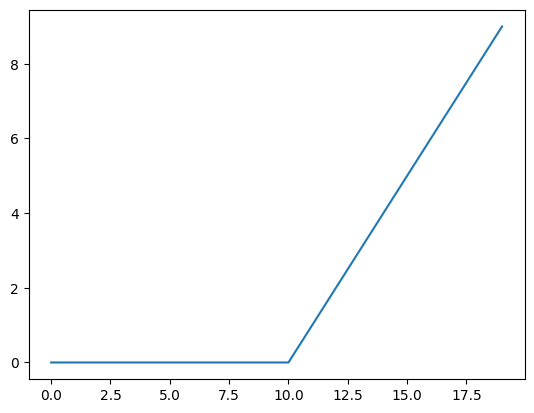

In [54]:
plt.plot(torch.relu(A))

In [55]:
# Lets code relu

def relu(x):
    return torch.max(torch.tensor(0),x) #inputs should be tensors

relu(A)


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

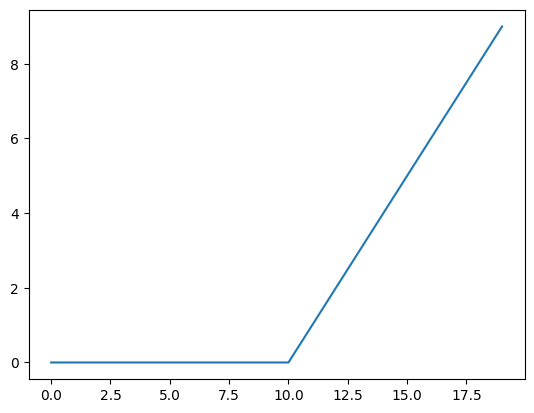

In [56]:
# plot our relu function on A
plt.plot(relu(A))

In [57]:
# Lets code sigmoid function
def sigmoid(x):
    return 1/(1+torch.exp(-x))

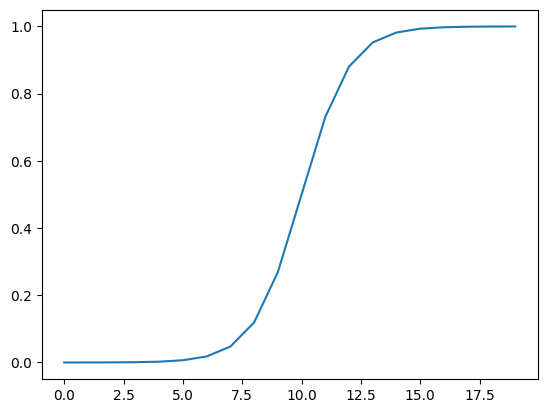

In [58]:
plt.plot(torch.sigmoid(A))

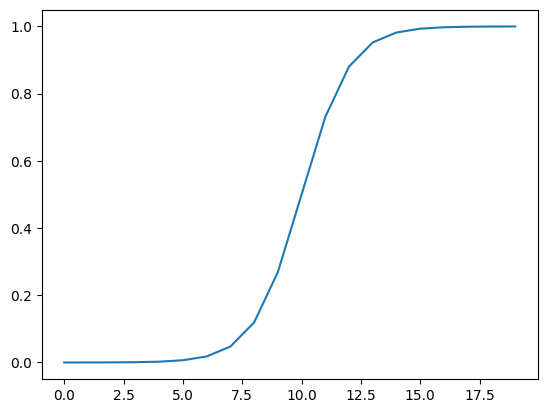

In [59]:
plt.plot(sigmoid(A))

## **Building a Mutliclass Classification**

Mutliclass Classification involves predicting more than one category 


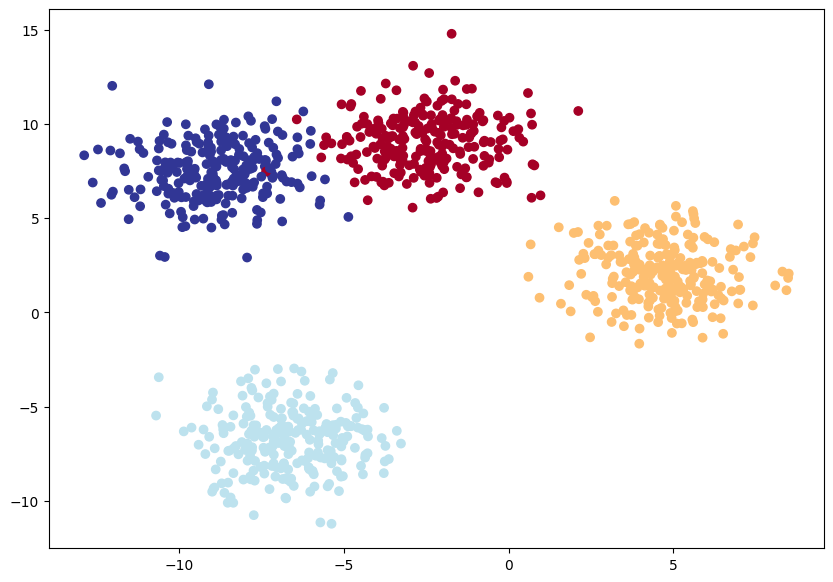

In [78]:

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set hyperparameters to be set for the model
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

# # Creating a toy multiclass dataset
X_blob,y_blob=make_blobs(n_samples=1000,n_features=NUM_FEATURES,
                        centers=NUM_CLASSES,cluster_std=1.5,
                        random_state=RANDOM_SEED
                    )

#turn data to tensors
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.long)

X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,y_blob,
                                                                   test_size=0.2,random_state=RANDOM_SEED)

#PLOT DATA
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [61]:
# buidling a mutliclass classification model in pytorch

from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features), 
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)


model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [79]:
X_blob_train.shape,y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [80]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

Cross Entropy Loss is useful when dataset is imbalanced in nature 

In [81]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.1)

**Getting Prediction Probabilites for a Multi Class Model**

In order to evaluate ad train and test our modle , we need to convert our model's  outputs (logits) to prediciton probabilites and then to prediciton labels

logits -> pred probs -> pred labels


In [82]:
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

In [83]:
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES 

(torch.Size([4]), 4)

In [84]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])


tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], grad_fn=<SliceBackward0>)


In [85]:
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

In [86]:
torch.max(y_pred_probs[0])

tensor(0.3715, grad_fn=<MaxBackward1>)

In [87]:
# how do we get the index of max value for each
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], grad_fn=<SelectBackward0>)
tensor(3)


In [ ]:
# prediction probabilites -> prediction labels
y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [72]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

In [89]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device).long()
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device).long()

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


In [ ]:
# Make prediction 
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# predicted logits ->  prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# prediction probabilities -> prediction labels
y_preds = y_pred_probs.argmax(dim=1)


print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


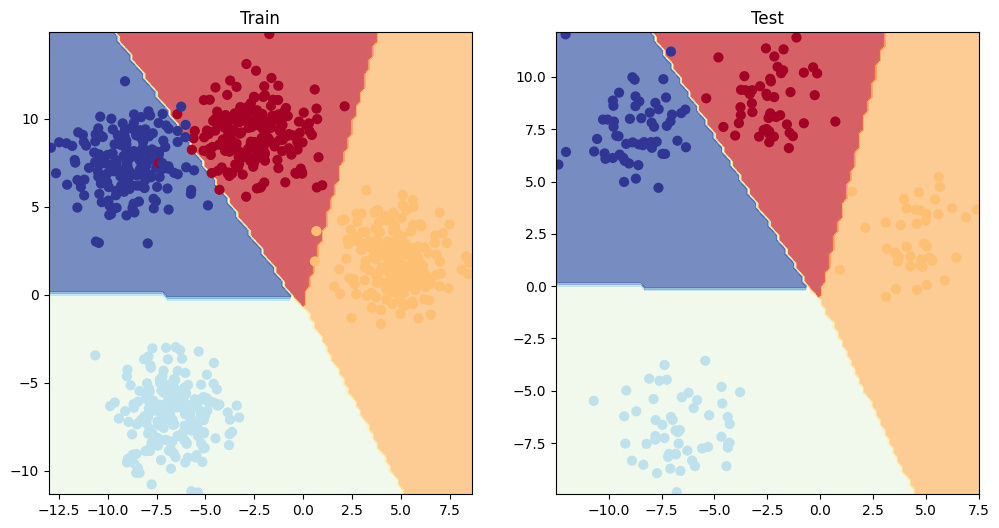

In [92]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)